In [2]:
import pandas as pd
import os

In [3]:
train = pd.read_excel('../data/train.xlsx')
test = pd.read_excel('../data/test.xlsx')

In [4]:
train.shape, test.shape

((7200, 2), (633, 2))

<Axes: xlabel='label'>

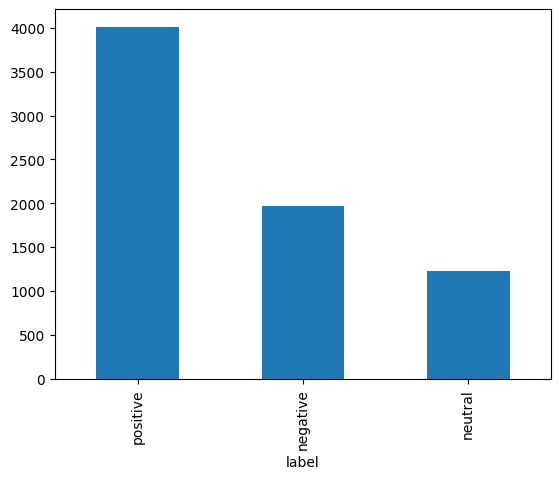

In [5]:
# 查看label分布,显示数字
train['label'].value_counts().plot(kind='bar')

<Axes: xlabel='label'>

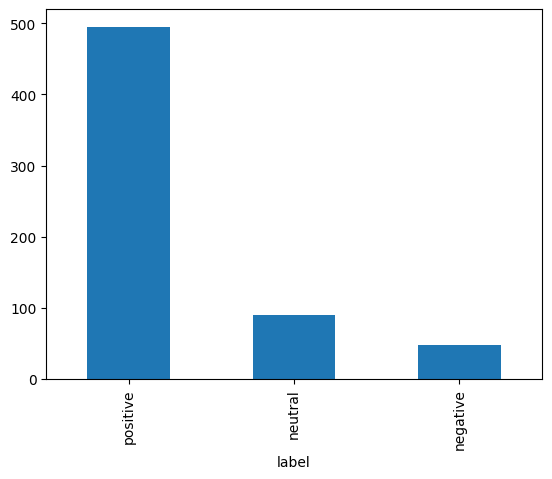

In [6]:
test['label'].value_counts().plot(kind='bar')

In [4]:
train.head()

,text,label
0,美媒称以黎就停火达成一致 黎真主党未表态,neutral
1,乌媒称乌议员提交议案草案 拟降低服兵役年龄,neutral
2,日本新型固体燃料火箭试验再次发生异常,negative
3,美国国债突破36万亿美元 债务螺旋带来严峻考验！,negative
4,印尼北苏门答腊卡罗县洪灾已造成10人死亡,negative


In [5]:
# 查看当前的唯一标签值
print("转换前的标签值:", train['label'].unique())

# 创建映射字典
unique_labels = sorted(train['label'].unique())
label_map = {old_label: new_label for new_label, old_label in enumerate(unique_labels)}

# 应用映射
train['label'] = train['label'].map(label_map)
test['label'] = test['label'].map(label_map)

# 查看转换后的标签分布
print("转换后的标签值:", train['label'].unique())
print("标签分布:")
print(train['label'].value_counts())

转换前的标签值: ['neutral' 'negative' 'positive']
转换后的标签值: [1 0 2]
标签分布:
label
2    4011
0    1964
1    1225
Name: count, dtype: int64


In [9]:
train.to_csv('../data/train.csv', index=False)
test.to_csv('../data/test.csv', index=False)

In [10]:
train_csv = pd.read_csv('../data/train.csv')
test_csv = pd.read_csv('../data/test.csv')

In [11]:
train_csv.head()

,text,label
0,美媒称以黎就停火达成一致 黎真主党未表态,1
1,乌媒称乌议员提交议案草案 拟降低服兵役年龄,1
2,日本新型固体燃料火箭试验再次发生异常,0
3,美国国债突破36万亿美元 债务螺旋带来严峻考验！,0
4,印尼北苏门答腊卡罗县洪灾已造成10人死亡,0


In [12]:
train_csv.shape

(7200, 2)

In [13]:
test_csv.head()

,text,label
0,【2022年卡塔尔世界杯】H组：韩国不敌加纳,0
1,【2022年卡塔尔世界杯——今日看点】伊朗为首次小组出线冲刺 英格兰、威尔士上演“英伦德比”,2
2,球队生死边缘 梅西力挽狂澜,2
3,输球后日本球员全体鞠躬致歉,0
4,【2022年卡塔尔世界杯——今日看点】巴西冲连胜晋级 C罗迎“复仇”时刻,2
